Overall Model: r = 0.805, p-value = 1.58e-44, n = 190
Category 2010_Jan: r = 0.800, p-value = 2.93e-09, n = 37
Category 2015_March: r = 0.847, p-value = 5.05e-10, n = 33
Category 2016_Feb: r = 0.794, p-value = 3.88e-14, n = 60
Category 2016_April: r = 0.847, p-value = 0.000513, n = 12
Category 2021_May: r = 0.778, p-value = 0.00039, n = 16
Category never_exp: r = 0.830, p-value = 4.42e-09, n = 32


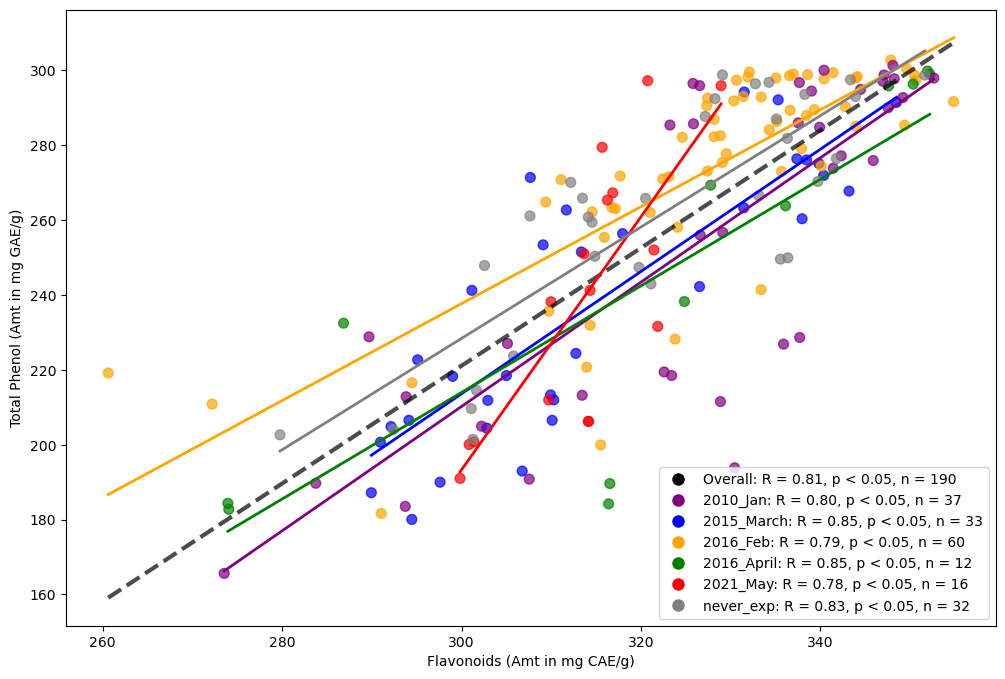

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the data
dataframe = r"C:\Users\bongo\OneDrive\Desktop\Phenolic compound\fire.xlsx"
df = pd.read_excel(dataframe)

# Prepare the feature and target variables
lai = df.iloc[:, 2]
flavonoids = df.iloc[:, 3]
phenolics = df.iloc[:, 4]

# Create a mapping of the indices to categories with updated year formats
categories = ['2015_March'] * 33 + ['2016_Feb'] * (93 - 33) + ['2016_April'] * (105 - 93) + \
             ['2021_May'] * (121 - 105) + ['2010_Jan'] * (158 - 121) + ['never_exp'] * (190 - 158)

# Define colors for each category
color_map = {
    '2010_Jan': 'purple',
    '2015_March': 'blue',
    '2016_Feb': 'orange',
    '2016_April': 'green',
    '2021_May': 'red',
    'never_exp': 'gray'
}

# Scatter plot setup
plt.figure(figsize=(12, 8))

# Overall regression
slope, intercept, r_value, p_value, std_err = stats.linregress(flavonoids, phenolics)
n_overall = len(flavonoids)  # Sample size for overall
print(f'Overall Model: r = {r_value:.3f}, p-value = {p_value:.3g}, n = {n_overall}')

# Plot overall regression line (bold and dashed)
x_fit = np.linspace(min(flavonoids), max(flavonoids), 100)
y_fit = slope * x_fit + intercept
plt.plot(x_fit, y_fit, 'k--', linewidth=3, label='Overall Regression Line', alpha=0.7)  # Bold and dashed

# Loop through each category for individual regression
r_values = {'Overall': (r_value, p_value, n_overall)}  # Include overall R value, p-value, and n
for category in color_map.keys():
    category_indices = [i for i, cat in enumerate(categories) if cat == category]
    X_cat = flavonoids.iloc[category_indices]
    y_cat = phenolics.iloc[category_indices]
    n_cat = len(X_cat)  # Sample size for category

    # Linear regression for the category
    slope_cat, intercept_cat, r_value_cat, p_value_cat, std_err_cat = stats.linregress(X_cat, y_cat)
    r_values[category] = (r_value_cat, p_value_cat, n_cat)
    print(f'Category {category}: r = {r_value_cat:.3f}, p-value = {p_value_cat:.3g}, n = {n_cat}')

    # Plot category regression line (solid line)
    x_fit_cat = np.linspace(X_cat.min(), X_cat.max(), 100)
    y_fit_cat = slope_cat * x_fit_cat + intercept_cat
    plt.plot(x_fit_cat, y_fit_cat, color=color_map[category], linestyle='-', linewidth=2, label=f'{category} Regression')  # Solid line

# Scatter plot
plt.scatter(flavonoids, phenolics, c=[color_map[cat] for cat in categories], alpha=0.7, s=50)

# Create legend handles for the top legend
handles_top = [
    plt.Line2D([0], [0], color='k', linestyle='--', linewidth=3, label='Overall Regression Line'),
    plt.Line2D([0], [0], marker='o', color='w', label='2010_Jan', markerfacecolor=color_map['2010_Jan'], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='2015_March', markerfacecolor=color_map['2015_March'], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='2016_Feb', markerfacecolor=color_map['2016_Feb'], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='2016_April', markerfacecolor=color_map['2016_April'], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='2021_May', markerfacecolor=color_map['2021_May'], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='never_exp', markerfacecolor=color_map['never_exp'], markersize=10)
]

# Top legend for categories and overall regression
plt.legend(handles=handles_top, title="Categories", loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=7)

# Bottom right corner for R values, p-values, and n
r_text_x = 0.95
r_text_y = 0.05

# Create legend handles for the bottom right corner
handles_bottom = []
# Add overall regression first
handles_bottom.append(plt.Line2D([0], [0], marker='o', color='w', label=f'Overall: R = {r_value:.2f}, p < 0.05, n = {n_overall}', 
                                   markerfacecolor='black', markersize=10))

# Add category regression results
for category in ['2010_Jan', '2015_March', '2016_Feb', '2016_April', '2021_May', 'never_exp']:
    r, p, n = r_values[category]
    handles_bottom.append(plt.Line2D([0], [0], marker='o', color='w', label=f'{category}: R = {r:.2f}, p < 0.05, n = {n}', 
                                       markerfacecolor=color_map[category], markersize=10))

# Add the legend for the bottom right corner
plt.legend(handles=handles_bottom, loc='lower right', fontsize=10)

plt.xlabel('Flavonoids (Amt in mg CAE/g)')
plt.ylabel('Total Phenol (Amt in mg GAE/g)')
plt.grid(False)

# Save the plot as an image
plt.savefig('flavonoids_vs_phenolics_with_regression_and_R_values_colored.png')

plt.show()